In [14]:
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../../")
import seaborn as sns 
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_logistica_ensamble as sc
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_pickle("../../data/cooked/sin_duplicados/datos_sinduplicados.pkl")
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,...,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1.547025,0,-0.390726,-0.888911,0.0,0.152824,-0.955943,1.418628,-1.153973,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.648117,1,0.102583,-1.865425,0.0,0.152824,-0.955943,-0.489710,2.142678,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.538360,0,0.965872,1.064117,0.0,0.166302,1.747807,2.746576,-0.055089,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.120183,0,-0.884034,2.040631,0.0,0.166302,0.846557,0.393594,-1.153973,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.538360,0,0.102583,-1.865425,0.0,0.166302,-0.955943,-0.884546,-0.879252,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


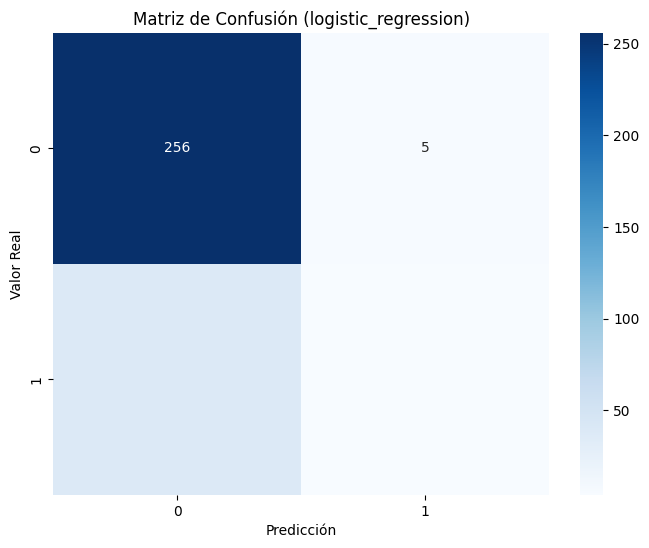

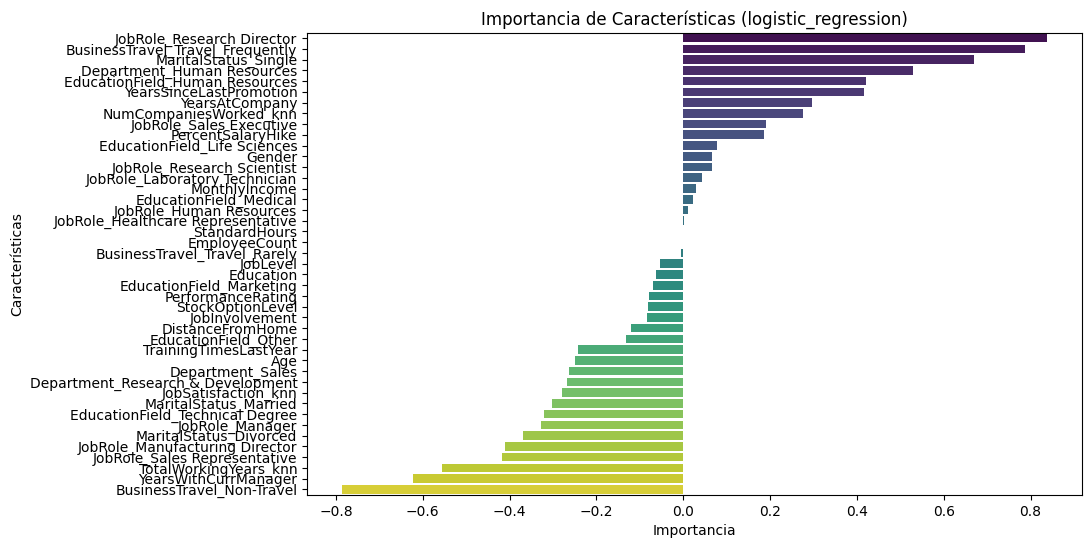

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,0.003999,8.0,NaN,NaN,regresion logistica
test,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,NaN,NaN,0.003999,8.0,regresion logistica


In [16]:
GestorLogistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

GestorLogistica.ajustar_modelo("logistic_regression")

GestorLogistica.plot_matriz_confusion("logistic_regression")
GestorLogistica.importancia_predictores(modelo_nombre ='logistic_regression')

df_resultados = GestorLogistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

El mejor modelo es DecisionTreeClassifier(max_depth=2, max_features=0.6, min_samples_leaf=10,
                       min_samples_split=20)


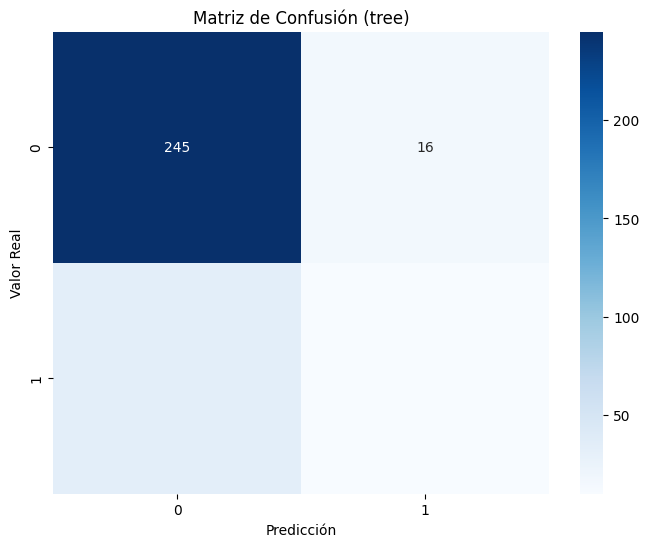

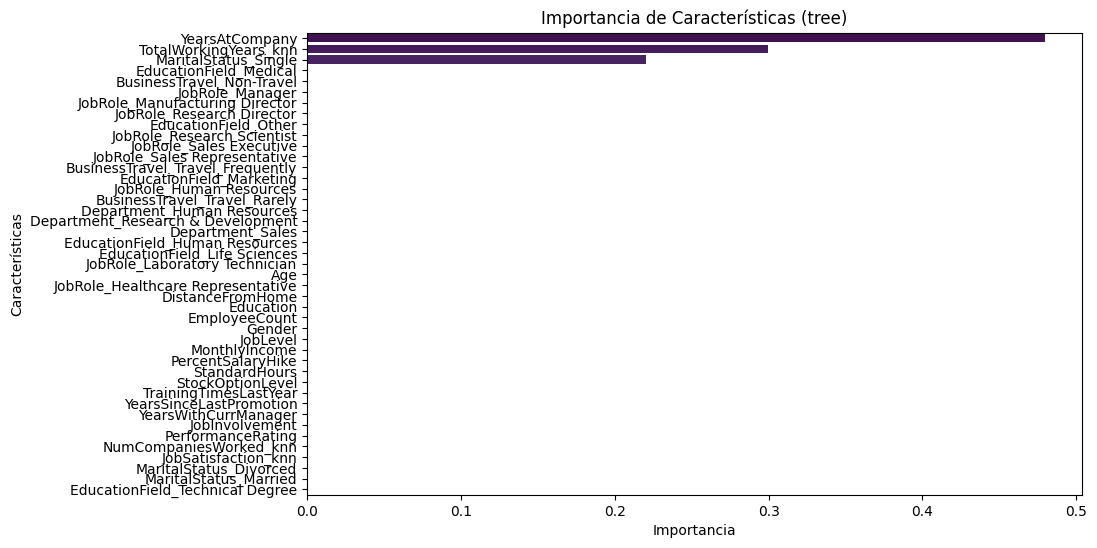

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.839109,0.806499,0.839109,0.808257,0.229641,0.678379,0.003038,8.0,NaN,NaN,decision tree
test,0.838816,0.811041,0.838816,0.821502,0.205123,0.623675,NaN,NaN,0.003038,8.0,decision tree
train,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,0.003999,8.0,NaN,NaN,regresion logistica
test,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,NaN,NaN,0.003999,8.0,regresion logistica


In [17]:
GestorLogistica.ajustar_modelo("tree")

GestorLogistica.plot_matriz_confusion("tree")
GestorLogistica.importancia_predictores(modelo_nombre ='tree')

df_resultados_tree = GestorLogistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_leaf=10,
                       min_samples_split=25, n_estimators=150)


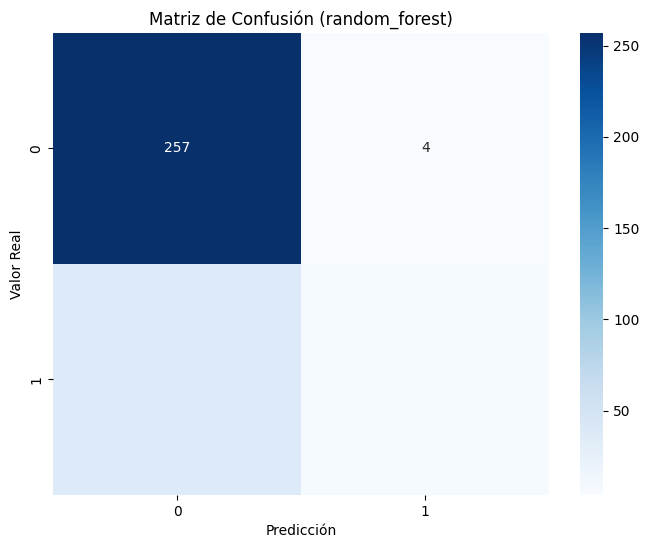

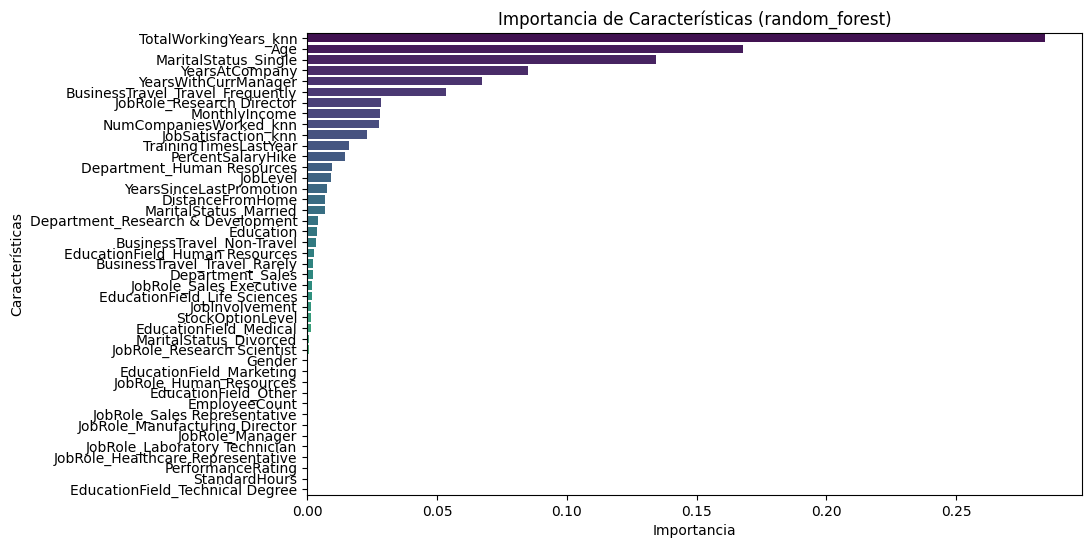

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.839109,0.806499,0.839109,0.808257,0.229641,0.678379,0.003038,8.0,NaN,NaN,decision tree
test,0.838816,0.811041,0.838816,0.821502,0.205123,0.623675,NaN,NaN,0.003038,8.0,decision tree
train,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,0.003999,8.0,NaN,NaN,regresion logistica
test,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,NaN,NaN,0.003999,8.0,regresion logistica
train,0.849010,0.835118,0.849010,0.802146,0.186881,0.789268,0.010998,NaN,NaN,NaN,random_forest
test,0.865132,0.835372,0.865132,0.827154,0.182796,0.700704,NaN,NaN,0.010998,NaN,random_forest


In [18]:
GestorLogistica.ajustar_modelo("random_forest")

GestorLogistica.plot_matriz_confusion("random_forest")
GestorLogistica.importancia_predictores(modelo_nombre ='random_forest')

df_resultados_forest = GestorLogistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.03, max_features='sqrt',
                           min_samples_leaf=12, min_samples_split=25,
                           n_estimators=150, subsample=0.8)


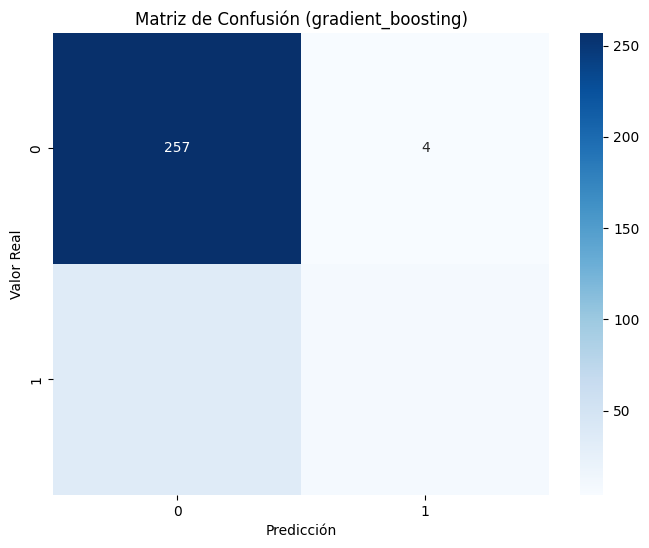

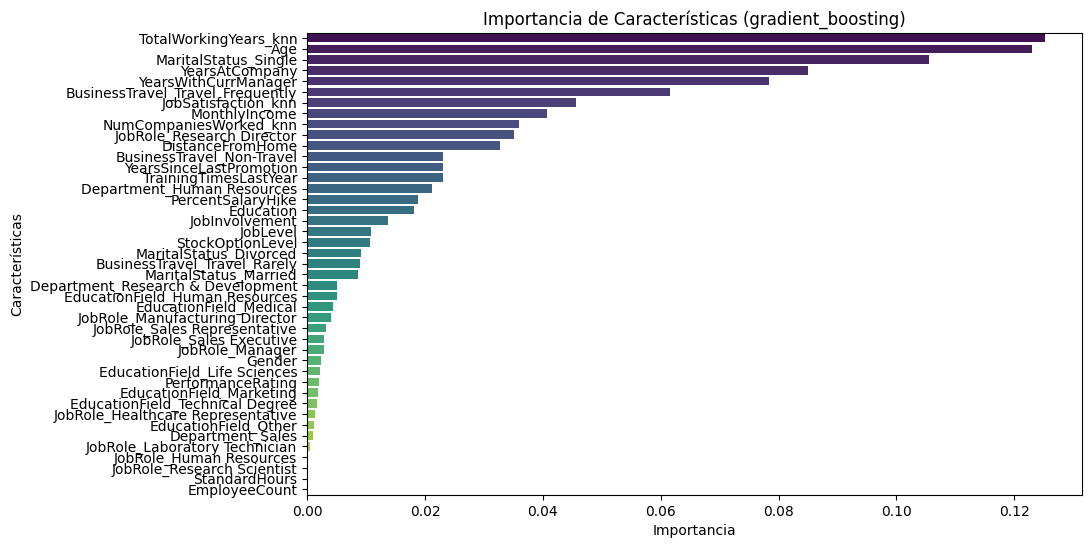

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.839109,0.806499,0.839109,0.808257,0.229641,0.678379,0.003038,8.0,NaN,NaN,decision tree
test,0.838816,0.811041,0.838816,0.821502,0.205123,0.623675,NaN,NaN,0.003038,8.0,decision tree
train,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,0.003999,8.0,NaN,NaN,regresion logistica
test,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,NaN,NaN,0.003999,8.0,regresion logistica
train,0.849010,0.835118,0.849010,0.802146,0.186881,0.789268,0.010998,NaN,NaN,NaN,random_forest
test,0.865132,0.835372,0.865132,0.827154,0.182796,0.700704,NaN,NaN,0.010998,NaN,random_forest
train,0.862211,0.863189,0.862211,0.823883,0.279373,0.871592,0.020000,8.0,NaN,NaN,gradient_boosting
test,0.871711,0.849942,0.871711,0.839152,0.244263,0.712822,NaN,NaN,0.020000,8.0,gradient_boosting


In [19]:
GestorLogistica.ajustar_modelo("gradient_boosting")

GestorLogistica.plot_matriz_confusion("gradient_boosting")
GestorLogistica.importancia_predictores(modelo_nombre ='gradient_boosting')

df_resultados_gradient = GestorLogistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


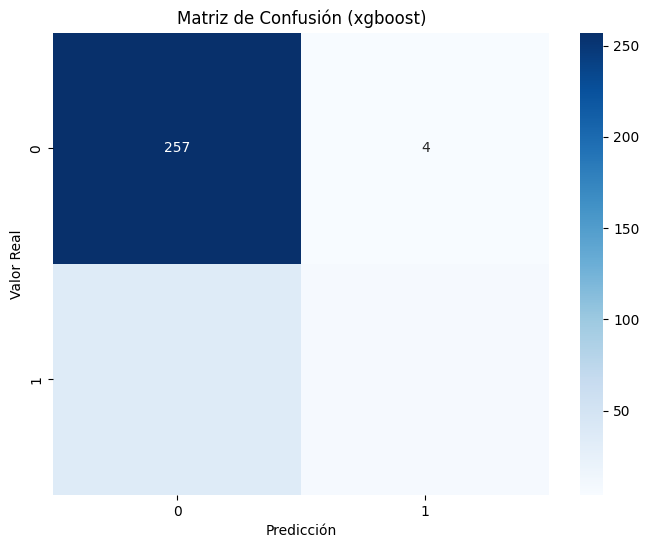

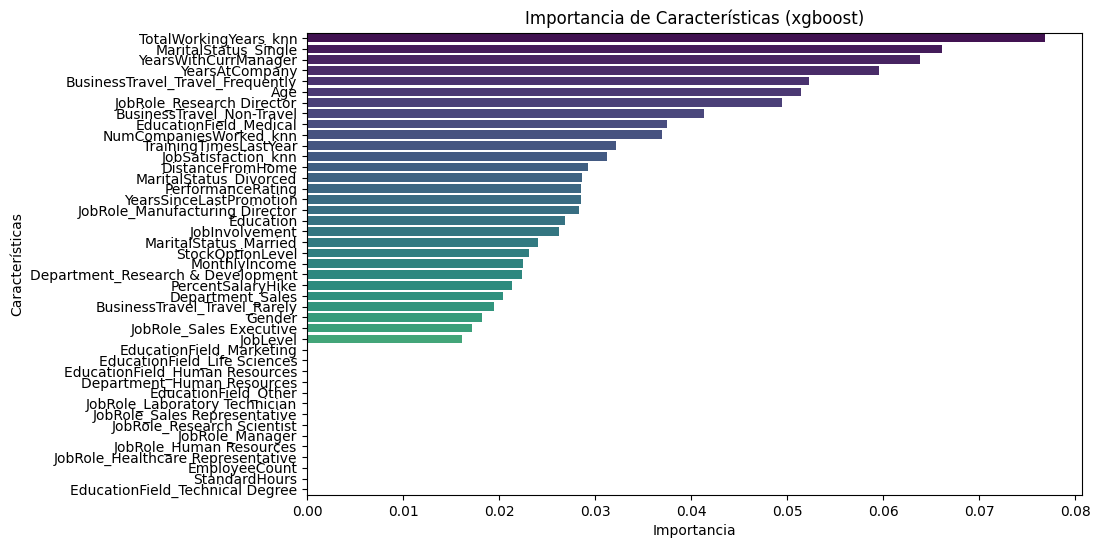

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.839109,0.806499,0.839109,0.808257,0.229641,0.678379,0.003038,8.0,NaN,NaN,decision tree
test,0.838816,0.811041,0.838816,0.821502,0.205123,0.623675,NaN,NaN,0.003038,8.0,decision tree
train,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,0.003999,8.0,NaN,NaN,regresion logistica
test,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,NaN,NaN,0.003999,8.0,regresion logistica
train,0.849010,0.835118,0.849010,0.802146,0.186881,0.789268,0.010998,NaN,NaN,NaN,random_forest
test,0.865132,0.835372,0.865132,0.827154,0.182796,0.700704,NaN,NaN,0.010998,NaN,random_forest
train,0.862211,0.863189,0.862211,0.823883,0.279373,0.871592,0.020000,8.0,NaN,NaN,gradient_boosting
test,0.871711,0.849942,0.871711,0.839152,0.244263,0.712822,NaN,NaN,0.020000,8.0,gradient_boosting
train,0.853960,0.846548,0.853960,0.810565,0.222773,0.822889,0.014999,NaN,NaN,NaN,xgboost
test,0.868421,0.843077,0.868421,0.833235,0.213963,0.735899,NaN,NaN,0.014999,NaN,xgboost


In [20]:
GestorLogistica.ajustar_modelo("xgboost")

GestorLogistica.plot_matriz_confusion("xgboost")
GestorLogistica.importancia_predictores(modelo_nombre ='xgboost')

df_resultados_xgboost = GestorLogistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [22]:
df_comparacion = df_resultados_final.copy()
df_comparacion.reset_index(inplace = True, drop = True)
df_comparacion.drop(["time_seconds", "n_jobs", "tiempo_computacion(segundos)", "nucleos_usados"], axis=1, inplace=True)
df_comparacion = df_comparacion.style.apply(sc.color_filas_por_modelo, axis=1)
df_comparacion

,accuracy,precision,recall,f1,kappa,auc,modelo
0,0.839109,0.806499,0.839109,0.808257,0.229641,0.678379,decision tree
1,0.838816,0.811041,0.838816,0.821502,0.205123,0.623675,decision tree
2,0.852310,0.835117,0.852310,0.813017,0.236400,0.785533,regresion logistica
3,0.855263,0.807915,0.855263,0.812371,0.110283,0.717455,regresion logistica
4,0.849010,0.835118,0.849010,0.802146,0.186881,0.789268,random_forest
5,0.865132,0.835372,0.865132,0.827154,0.182796,0.700704,random_forest
6,0.862211,0.863189,0.862211,0.823883,0.279373,0.871592,gradient_boosting
7,0.871711,0.849942,0.871711,0.839152,0.244263,0.712822,gradient_boosting
8,0.853960,0.846548,0.853960,0.810565,0.222773,0.822889,xgboost
9,0.868421,0.843077,0.868421,0.833235,0.213963,0.735899,xgboost


# Informe sobre Métricas de Modelos Predictivos

En esta tabla se presentan las métricas de evaluación de varios modelos predictivos utilizados para un problema de clasificación. A continuación, se analizan los resultados de las diferentes métricas clave para todos los modelos.

---

## **Métricas Presentadas**
1. **Accuracy**: Proporción de predicciones correctas respecto al total.
2. **Precision**: Proporción de verdaderos positivos respecto a todas las predicciones positivas. Alta precisión indica pocos falsos positivos.
3. **Recall**: Proporción de verdaderos positivos respecto al total de positivos reales. Un recall alto indica pocos falsos negativos.
4. **F1-Score (F1)**: Media armónica entre precision y recall. Útil cuando los datos están desbalanceados.
5. **Kappa**: Métrica que evalúa la concordancia entre las predicciones del modelo y las reales, ajustando por el azar.
6. **AUC (Área bajo la curva ROC)**: Mide la capacidad del modelo para discriminar entre clases. Un AUC cercano a 1 es ideal.

---

## **Análisis por Modelo**

### **1. Decision Tree**

- **Accuracy**: ~83.9%.
- **Precision & Recall**: ~80.6-81.1%
- **F1-Score**: ~0.81
- **Kappa**: ~0.22
- **AUC**: ~0.62 y ~0.67

---

### **2. Regresión Logística**

- **Accuracy**: ~85.2%
- **Precision & Recall**: ~83.5-85.2%
- **F1-Score**: ~0.81
- **Kappa**: ~0.23
- **AUC**: ~0.78

---

### **3. Random Forest**

- **Accuracy**: ~85.5-86.5%
- **Precision & Recall**: ~83.5-86.5%
- **F1-Score**: ~0.82
- **Kappa**: ~0.18-0.23
- **AUC**: ~0.78

---

### **4. Gradient Boosting**

- **Accuracy**: ~86.2-87.1%
- **Precision & Recall**: ~86.3-87.1%
- **F1-Score**: ~0.83
- **Kappa**: ~0.24-0.27
- **AUC**: ~0.82

---

### **5. XGBoost**

- **Accuracy**: ~85.9-86.8%.
- **Precision & Recall**: ~84.5-86.8%
- **F1-Score**: ~0.83, 
- **Kappa**: ~0.21-0.24
- **AUC**: ~0.82-0.73

---

## **Comparativa General**

- **Gradient Boosting** se destaca como el modelos con mejor rendimiento global, con altos valores en métricas como **accuracy**, **F1-score** y **AUC**.

-  **XGBoost** ofrece un rendimiento comparable al Gradient Boosting, le sigue por detras en casi todas las metricas pero también es un buen modelo.

---

